# Covid-19

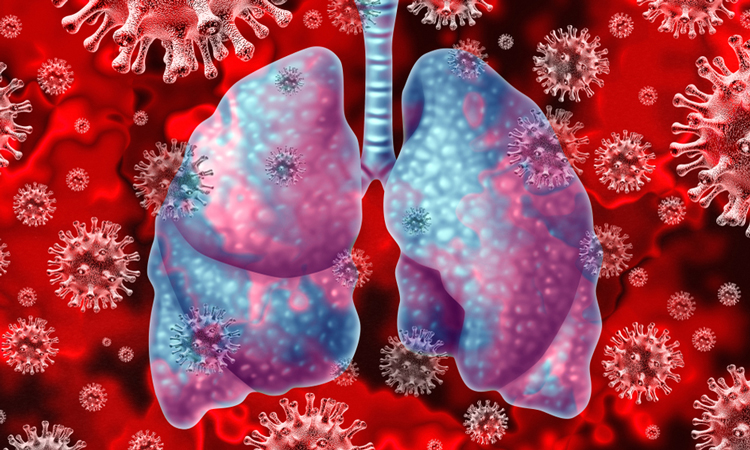

# Where it all began?
The coronavirus outbreak came to light on December 31, 2019 when China informed the World Health Organisation of a cluster of cases of pneumonia of an unknown cause in Wuhan City in Hubei Province. Subsequently the disease spread to more Provinces in China, and to the rest of the world. The WHO has now declared it a pandemic. The virus has been named SARS-CoV-2 and the disease is now called COVID-19.

# Covid in India

Government of India is taking all necessary steps to ensure that we are prepared well to face the challenge and threat posed by the growing pandemic of COVID-19 the Corona Virus. Total number of novel coronavirus cases in India crossed the 26000 mark on Sunday with nearly 2000 fresh Covid-19 cases reported from across the country in a span of 24 hours, so far it has killed more than 800 people in India. With active support of the people of India, we have been able to contain the spread of the Virus in our country. The most important factor in preventing the spread of the Virus locally is to empower the citizens with the right information and taking precautions as per the advisories being issued by Ministry of Health & Family Welfare.

# How it spreads?

The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces. You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.

# How to prevent the spread?

1. Clean your hands often. Use soap and water, or an alcohol-based hand rub.
2. Maintain a safe distance from anyone who is coughing or sneezing.
3. Don’t touch your eyes, nose or mouth.
4. Cover your nose and mouth with your bent elbow or a tissue when you cough or sneeze.
5. Stay home if you feel unwell.
6. If you have a fever, a cough, and difficulty breathing, seek medical attention. Call in advance.
7. Follow the directions of your local health authority.

# Background of this work

COVID is possibly better diagnosed using radiological imaging Fang, 2020. Companies are developing AI tools and deploying them at hospitals Wired 2020. We should have an open database to develop free tools that will also provide assistance.

# About the dataset
This dataset is a database of COVID-19 cases with chest X-ray or CT images. It contains COVID-19 cases as well as MERS, SARS, and ARDS.Source of this dataset is kaggle (https://www.kaggle.com/bachrr/covid-chest-xray). Here is a list of each metadata field, with explanations:

- Patientid (internal identifier, just for this dataset)
- offset (number of days since the start of symptoms or hospitalization for each image, this is very important to have when there are multiple images for the same patient to track progression while being imaged. If a report says "after a few days" let's assume 5 days.)
- sex (M, F, or blank)
- age (age of the patient in years)
- finding (which pneumonia)
- survival (did they survive? Y or N)
- view (for example, PA, AP, or L for X-rays and Axial or Coronal for CT scans)
- modality (CT, X-ray, or something else)
- date (date the image was acquired)
- location (hospital name, city, state, country) importance from right to left.
- filename
- doi (DOI of the research article
- url (URL of the paper or website where the image came from)
- license
- clinical notes (about the radiograph in particular, not just the patient)
- other notes (e.g. credit)

# Target of this task
By the use these images in Kaggle kernels to develop AI-based approaches to predict and understand COVID-19.


Let's START!!!!!!

Let's first import the packages necessary for the task and load the dataset. 

In [ ]:
import os
from os.path import join
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn .preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot,plot_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D,Dropout,Flatten,Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Setting the image dimensions.

In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
lbls = list(map(str, range(NB_CLASSES)))
EPOCHS = 50
batch_size = 2

In [ ]:
DATASET_DIR = "../input/covid-19-x-ray-10000-images/dataset"

Let's have a quick of data.

In [ ]:

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))
    
fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray')

Now, applying the model.

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu',
                      input_shape = (IMG_W,IMG_H,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


classifier.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

classifier.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 2, activation = 'softmax'))
classifier.compile(optimizer = Adam(lr=0.001),loss='categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
classifier.summary()

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        #featurewise_center=False,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        #featurewise_std_normalization=False,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
        #zca_whitening=False,  # apply ZCA whitening
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        #zoom_range = 0.1, # Randomly zoom image 
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip=True,  # randomly flip images
        #vertical_flip=False,  # randomly flip images
        #preprocessing_function=preprocess_image,
        rescale = 1./255,
        validation_split = 0.3) 
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=4,
    class_mode='categorical',
    subset='training')
validation_generator = datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=4,
    class_mode='categorical',
    shuffle= False,
    subset='validation')

In [ ]:
es= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 10)
mc = ModelCheckpoint('cnn_4_march.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [ ]:
history = classifier.fit_generator(train_generator,
                         steps_per_epoch = 10,
                         epochs=50,
                         callbacks = [es, mc],
                         workers=4,
                         validation_data = validation_generator,
                         validation_steps = 10)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

In [ ]:
print("training_loss", history.history['loss'][-1])
print("validation_loss", history.history['val_loss'][-1])

In [ ]:
train_generator.class_indices